In [1]:
train_dir = 'C:/Users/shker/OneDrive/Desktop/MEC/semester 6/Artificial Intelligence/Assignment/archive/TRAIN'
test_dir = 'C:/Users/shker/OneDrive/Desktop/MEC/semester 6/Artificial Intelligence/Assignment/archive/TEST'

In [2]:
import os
print(len(os.listdir('C:/Users/shker/OneDrive/Desktop/MEC/semester 6/Artificial Intelligence/Assignment/archive/TRAIN/B')))
print(len(os.listdir('C:/Users/shker/OneDrive/Desktop/MEC/semester 6/Artificial Intelligence/Assignment/archive/TRAIN/N')))
print(len(os.listdir('C:/Users/shker/OneDrive/Desktop/MEC/semester 6/Artificial Intelligence/Assignment/archive/TEST/B')))
print(len(os.listdir('C:/Users/shker/OneDrive/Desktop/MEC/semester 6/Artificial Intelligence/Assignment/archive/TEST/N')))

29961
29961
8363
8363


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  
)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  
    subset='training'  
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  
)

validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  
)


Found 47938 images belonging to 2 classes.
Found 11984 images belonging to 2 classes.


In [5]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [6]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) 
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid')) 

In [7]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
history = model.fit(train_data, epochs=3, validation_data=validation_data)

Epoch 1/3


1499/1499 [==============================] - 1518s 1s/step - loss: 0.2933 - accuracy: 0.8810 - val_loss: 0.1954 - val_accuracy: 0.9241
Epoch 2/3
1499/1499 [==============================] - 1401s 934ms/step - loss: 0.2079 - accuracy: 0.9199 - val_loss: 0.1686 - val_accuracy: 0.9345
Epoch 3/3
1499/1499 [==============================] - 1406s 938ms/step - loss: 0.1603 - accuracy: 0.9398 - val_loss: 0.1709 - val_accuracy: 0.9342


In [19]:
import matplotlib.pyplot as plt

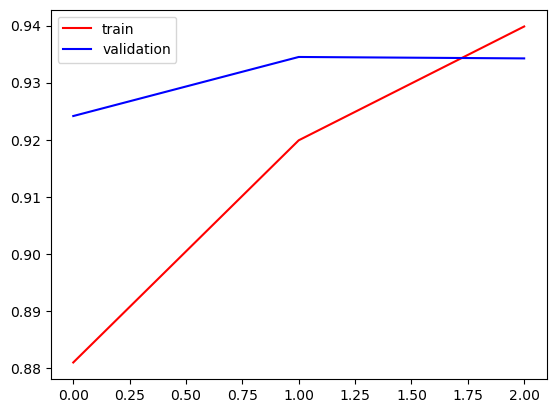

In [20]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

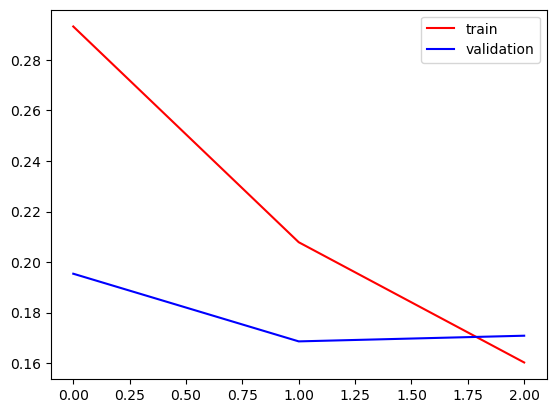

In [21]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [22]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 16726 images belonging to 2 classes.


In [23]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 16726 images belonging to 2 classes.


In [24]:
predictions = model.predict(test_data)
print(predictions)

523/523 [==============================] - 105s 200ms/step
[[0.84410006]
 [0.93814176]
 [0.29683462]
 ...
 [0.67052376]
 [0.9994592 ]
 [0.986947  ]]


In [25]:
len(predictions)

16726

In [26]:
from sklearn.metrics import confusion_matrix, classification_report

In [27]:
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int) 

cm = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[4074 4289]
 [3926 4437]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.49      0.50      8363
           1       0.51      0.53      0.52      8363

    accuracy                           0.51     16726
   macro avg       0.51      0.51      0.51     16726
weighted avg       0.51      0.51      0.51     16726

